In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Exploration

In [ ]:
df = pd.read_csv('homicide_by_countries.csv')
df.head(10)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
5,Anguilla,Americas,Caribbean,28.3,4,2014
6,Antigua and Barbuda,Americas,Caribbean,9.2,9,2020
7,Argentina,Americas,South America,5.3,2416,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
9,Aruba,Americas,Caribbean,1.9,2,2014


In [ ]:
# Data Cleaning
df['count'].sum()

# Check for missing values
df.isnull().sum()
df.shape

(195, 6)

In [ ]:
# convert column type to correct type
my_list = ['Count', 'Year', 'Rate']
for i in my_list:
    df[i] = df[i].astype(int)
df.info()

# Convert column titles to all lowercase
df.columns = df.columns.str.lower()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   195 non-null    object
 1   Region     195 non-null    object
 2   Subregion  195 non-null    object
 3   Rate       195 non-null    int32 
 4   Count      195 non-null    int32 
 5   Year       195 non-null    int32 
dtypes: int32(3), object(3)
memory usage: 7.0+ KB


In [23]:
#Feature Engineering
df['percentage_of_total'] = (df['count'] * 100 / df['count'].sum()).round(2)
df

,location,region,subregion,rate,count,year,percentage_of_total
0,Afghanistan,Asia,Southern Asia,6,2474,2018,0.65
1,Albania,Europe,Southern Europe,2,61,2020,0.02
2,Algeria,Africa,Northern Africa,1,580,2020,0.15
3,Andorra,Europe,Southern Europe,2,2,2020,0.00
4,Angola,Africa,Middle Africa,4,1217,2012,0.32
...,...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018,2.80
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011,0.36
192,Yemen,Asia,Western Asia,6,1703,2013,0.45
193,Zambia,Africa,Eastern Africa,5,853,2015,0.23


### Global Homicide Count & Homicide Rate 

In [ ]:
# Global homicide count and average rate
global_count = df['count'].sum()
global_avg_rate = df['rate'].mean()
year_range = df['year'].min(), df['year'].max()

print(f"Total Homicide Count: {global_count:,}")
print(f"Global Average Homicide Rate: {global_avg_rate:.2f} Per 100,00 People")
print(f"Year Range: {year_range[0]} to {year_range[1]}")


Total Homicide Count: 378,846
Global Average Homicide Rate: 6.41 Per 100,00 People
Year Range: 2006 to 2021


### Top Countries By Homicide Rate (per 100k people)

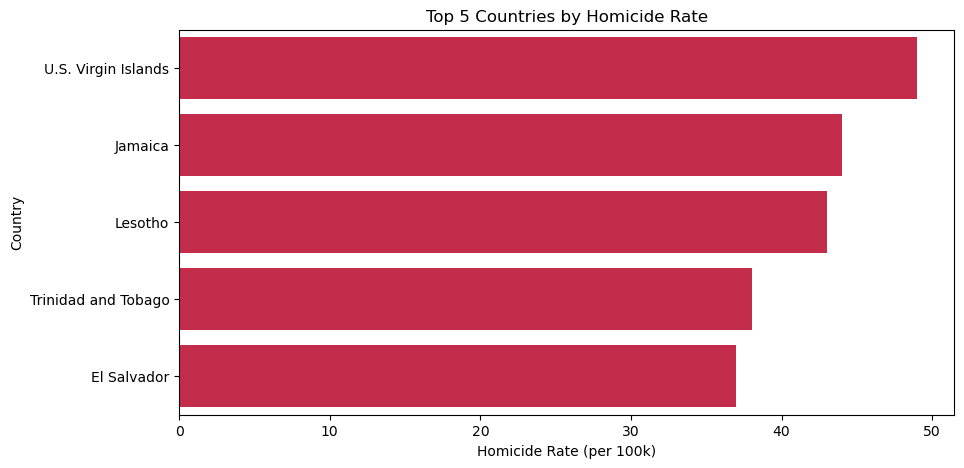

In [27]:
# Top 5 countries by highest homicide rate
top_countries = df.sort_values('rate', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x='rate', y='location', data=top_countries, color='crimson')
plt.title('Top 5 Countries by Homicide Rate')
plt.xlabel('Homicide Rate (per 100k)')
plt.ylabel('Country')
plt.show()


### Top Countries By Homicide Count

In [24]:
# Top 10 countries by percentage of global homicides
top_countries_by_percentage = df.sort_values('percentage_of_total', ascending=False).head(5)
top_countries_by_percentage

,location,region,subregion,rate,count,year,percentage_of_total
26,Brazil,Americas,South America,22,47722,2020,12.60
125,Nigeria,Africa,Western Africa,22,44200,2019,11.67
78,India,Asia,Southern Asia,3,40651,2020,10.73
111,Mexico,Americas,Central America,28,36579,2020,9.66
186,United States,Americas,Northern America,6,21570,2020,5.69


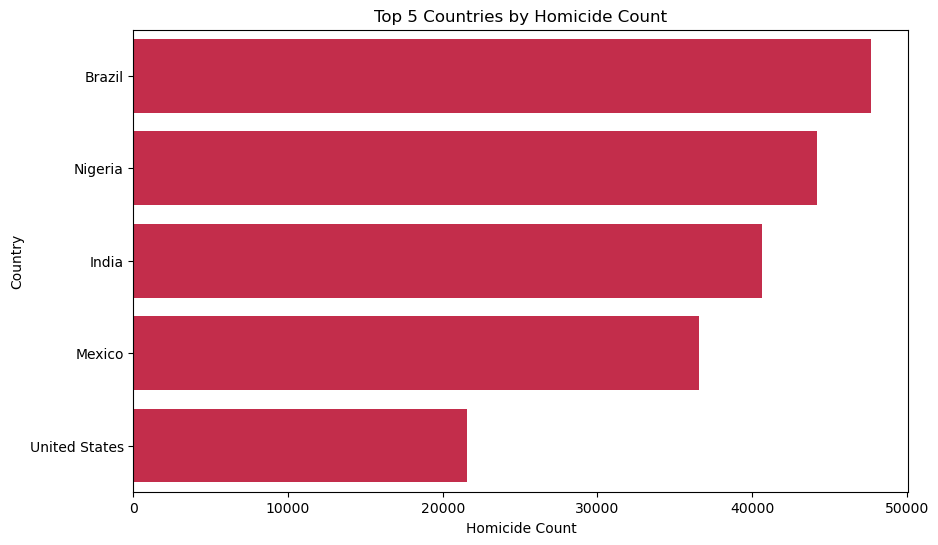

In [26]:
# Top 10 countries by homicide count
top_countries_by_count = df.sort_values('count', ascending=False).head(5)
top_countries_by_count

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='location', data=top_countries_by_count, color='crimson')
plt.title('Top 5 Countries by Homicide Count')
plt.xlabel('Homicide Count')
plt.ylabel('Country')
plt.show()


## Regional Analysis

In [31]:
region_count = df.groupby('region').agg({
    'count': 'sum',
    'rate': 'mean',
    'percentage_of_total': 'sum'
}).sort_values('count', ascending=False)
region_count

,count,rate,percentage_of_total
region,,,
Americas,153597,15.568627,40.54
Asia,105552,2.352941,27.84
Africa,99481,6.950000,26.26
Europe,19869,1.098039,5.23
Oceania,347,1.000000,0.09


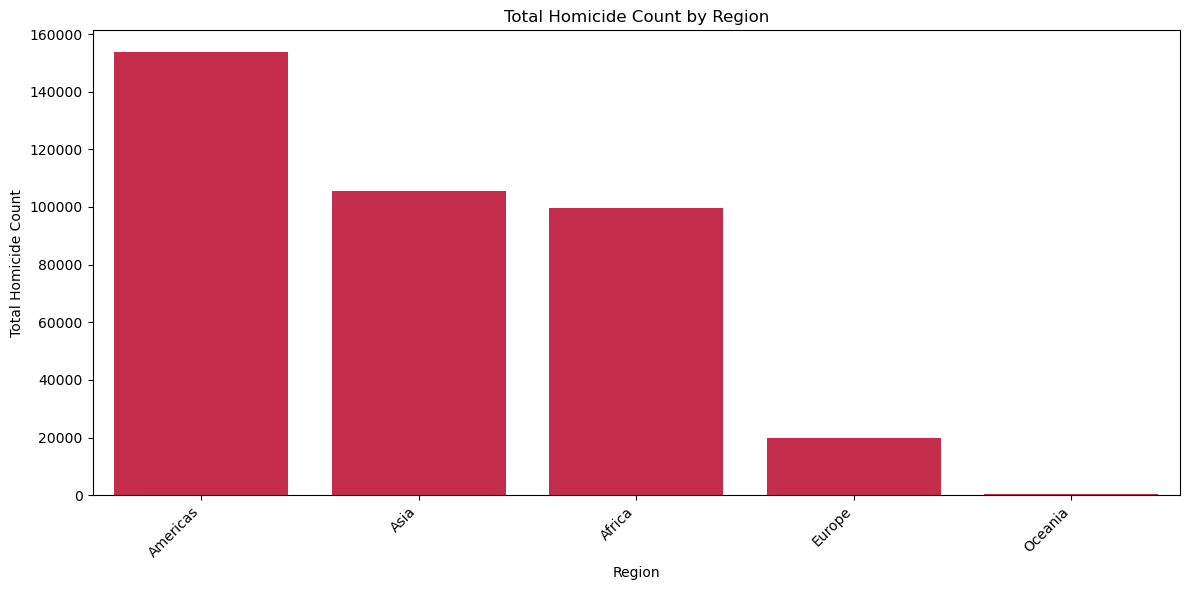

In [32]:
# Visualizing regional homicide count
plt.figure(figsize=(12,6))
sns.barplot(x=region_count.index, y=region_count['count'], color='crimson')
plt.title('Total Homicide Count by Region')
plt.xlabel('Region')
plt.ylabel('Total Homicide Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
#Percentage Of Share by Region
region_share = region_stats['percentage_of_total']
region_share

region
Americas    40.54
Asia        27.84
Africa      26.26
Europe       5.23
Oceania      0.09
Name: percentage_of_total, dtype: float64

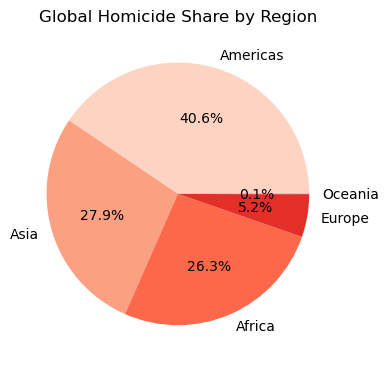

In [35]:
# Pie chart for homicide share by region
plt.figure(figsize=(4, 4))
region_share.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Reds', len(region_share)))
plt.title('Global Homicide Share by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


### How Does Nigeria Compare?

In [38]:
nigeria = df[df['location'] == 'Nigeria'].iloc[0]
nigeria

location                      Nigeria
region                         Africa
subregion              Western Africa
rate                               22
count                           44200
year                             2019
percentage_of_total             11.67
Name: 125, dtype: object

In [ ]:
# Getting global average rate and Africa average rate
africa_df = df[df['region'] == 'Africa']
africa_avg_rate = africa_df['rate'].mean()
africa_avg_count = africa_df['count'].mean()
world_avg_rate = df['rate'].mean()

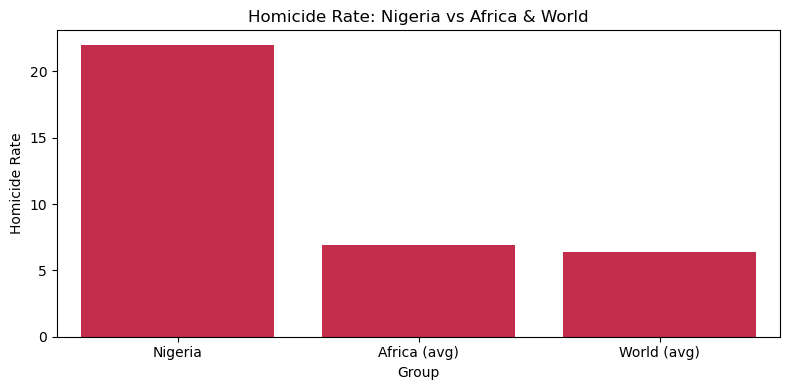

In [46]:
# Visualize Nigeria vs Africa vs World
comparison = pd.DataFrame({
    'Group': ['Nigeria', 'Africa (avg)', 'World (avg)'],
    'Rate': [nigeria['rate'], africa_avg_rate, world_avg_rate],
    'Count': [nigeria['count'], africa_avg_count, df['count'].mean()]
})

plt.figure(figsize=(8,4))
sns.barplot(x='Group', y='Rate', data=comparison, color='crimson')
plt.title('Homicide Rate: Nigeria vs Africa & World')
plt.ylabel('Homicide Rate')
plt.tight_layout()
plt.show()


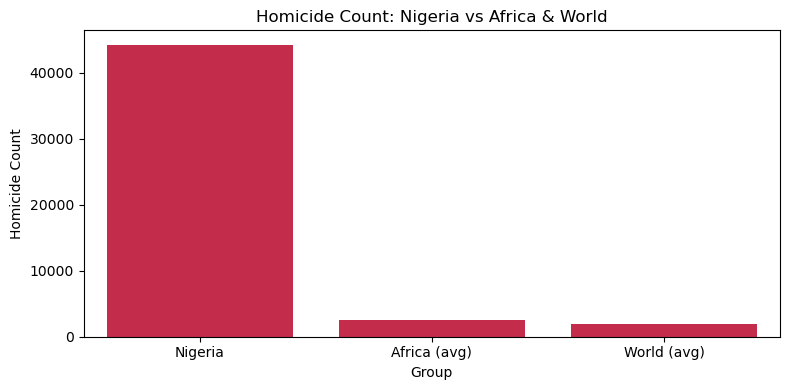

In [45]:
# Homicide count comparison
plt.figure(figsize=(8,4))
sns.barplot(x='Group', y='Count', data=comparison, color='crimson')
plt.title('Homicide Count: Nigeria vs Africa & World')
plt.ylabel('Homicide Count')
plt.tight_layout()
plt.show()

### Global Comparisons

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


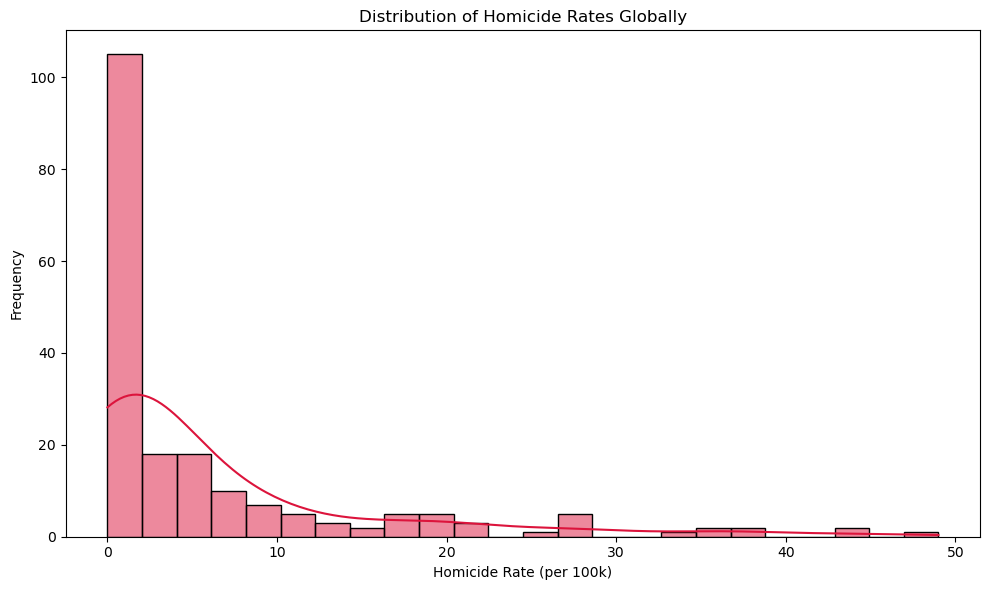

In [47]:
# Global Homicide Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], kde=True, color='crimson')
plt.title('Distribution of Homicide Rates Globally')
plt.xlabel('Homicide Rate (per 100k)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


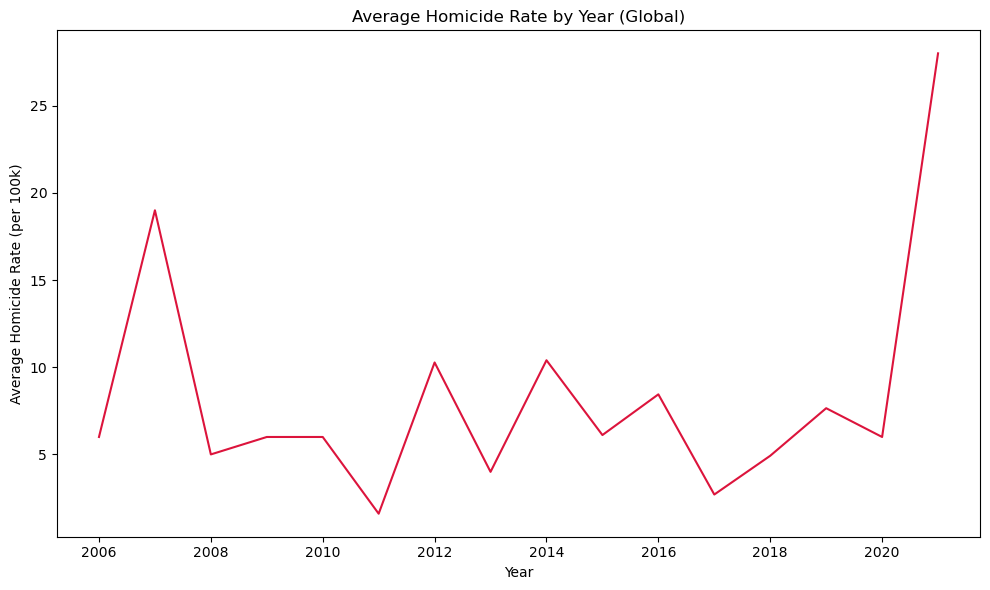

In [42]:
# Plotting homicide rate over years globally
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('year')['rate'].mean(), color='crimson')
plt.title('Average Homicide Rate by Year (Global)')
plt.xlabel('Year')
plt.ylabel('Average Homicide Rate (per 100k)')
plt.tight_layout()
plt.show()
